## GRADIENT DESCENT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Symbol,lambdify  # to find derivative of a function

%matplotlib inline

---------------------------------------

**Simple Cost Function :**
$ f(x) = x^2 - x + 1$

**Derivative :**
$ D(f(x)) = 2x -1$



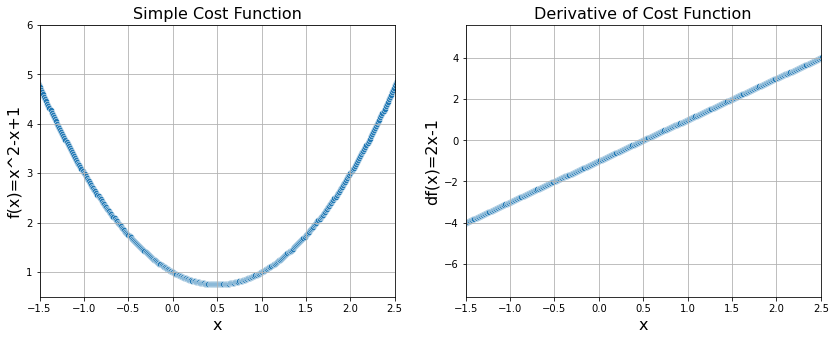

In [2]:
# Cost function
def f(x):
    return x**2-x+1

# Derivative of Cost function
def df(x):
    return 2*x - 1

p = np.linspace(-3,3,500)


plt.figure(figsize=(14,5))

# Plot Cost function
plt.subplot(121)
plt.xlabel('x',fontsize=16)
plt.xlim([-1.5,2.5])
plt.ylabel('f(x)=x^2-x+1',fontsize=16)
plt.ylim([0.5,6])
plt.title("Simple Cost Function",fontsize=16)
plt.grid()
sns.scatterplot(x = p,y = f(p))

# Plot Derivative of Cost function
plt.subplot(122)
plt.xlabel('x',fontsize=16)
plt.xlim([-1.5,2.5])
plt.ylabel('df(x)=2x-1',fontsize=16)
plt.title("Derivative of Cost Function",fontsize=16)
plt.grid()
sns.scatterplot(x = p,y = df(p))


plt.show()

---------------------------------------

### Gradient Descent - Everything defined inside a function

**Cost Function :**
$ f(x) = x^2 - x + 1$

**Derivative :**
$ D(f(x)) = 2x -1$


**Objective :** Find the optimal $ x $ to minimize the cost function, $ f(x) $ using Gradient Descent

---------------------------------------

**Function**

```
x = (Starting point)
alpha = (Step Multiplier)
precision = (Step size lower threshold)


Loop (for n iterations):
-> x_old = x
-> x = x - alpha * Slope(x)
-> if abs(x-x_old) < precision, end loop
-> else continue
```
---------------------------------------


In [3]:
def gradient_descent(
                     cost_function,
                     starting_point,
                     multiplier=0.02,
                     precision=0.001,
                     iterations=50000,
                     display_output=False,
                     linspace_range=None,
                     ):
    '''
    Defining the GD function that returns:
    1. local minima x
    2. list of x values produced during the iteration run
    3. list of gradient values at the respective x values
    4. final step size value
    
    Parameters:
    * cost_function       : User-defined Cost function (function)
    * starting_point      : Starting value of x (float)
    * multiplier          : Step multiplier for gradient (float)
    * precision           : Lower threshold for step size (float)
    * iterations          : Maximum number of iterations (integer)
    * display_output      : True, if final values and plots need to be displayed (boolean)
    * linspace_range      : List giving the range of x values to be used for plotting(used if display_output=True) (list of 3 values)
    '''
    
    #Calculate derivative of function
    x = Symbol('x')
    f = cost_function(x)
    df = f.diff(x)
    f_str,df_str = str(f),str(df)
    f = lambdify(x, f, 'numpy')
    df = lambdify(x, df, 'numpy')
    
    
    x=starting_point
    alpha=multiplier
    
    x_orig =starting_point

    x_list=[x]
    slope_list=[df(x)]

    for i in range(iterations):
        x_old = x
        gradient = df(x)

        x = x - alpha * df(x)

        x_list.append(x)
        slope_list.append(gradient)

        step_size=abs(x-x_old)
        if step_size<precision:
            break
    if display_output==True:
        
        print("Results :\n")  
        print("Total allowed iterations : ",iterations)
        print("Last iteration : ",i)
        print("\nStarting x : ",x_orig)
        print("Starting cost function : ",f(x_orig))

        print("\nLocal minimum x : ",x)
        print("Minimized Cost Function : ",f(x))
        print("Step size : ",step_size,'\n')
        
        
        p = np.linspace(linspace_range[0],linspace_range[1],linspace_range[2])
    
        # Plotting Cost function and Gradient        
        plt.figure(figsize=(15,10))

        # Plot Cost function

        plt.subplot(211)
        plt.xlabel('x',fontsize=16)
        plt.ylabel('f(x) = '+f_str,fontsize=16)
        plt.title("Minimized Cost Function starting at x= {}".format(x_orig),fontsize=16)
        plt.grid()
        sns.lineplot(x=p,y=f(p))
        sns.scatterplot(x = x_list,y = f(np.array(x_list)),color='red')
        
        # Plot Derivative of Cost function
        plt.subplot(212)
        plt.xlabel('x',fontsize=16)
        plt.ylabel('D[f(x)] = '+df_str,fontsize=16)
        plt.title("Derivative of Cost Function",fontsize=16)
        plt.grid()
        sns.lineplot(x = p,y = df(p))
        sns.scatterplot(x = x_list,y = df(np.array(x_list)),color='red')
        
        plt.show()
           
    
    return x,x_list,slope_list,step_size

### Single Minima

Results :

Total allowed iterations :  50000
Last iteration :  116

Starting x :  -3.8
Starting cost function :  5.84

Local minimum x :  -1.0235989291804748
Minimized Cost Function :  -1.999443090541535
Step size :  0.0009832887158531811 



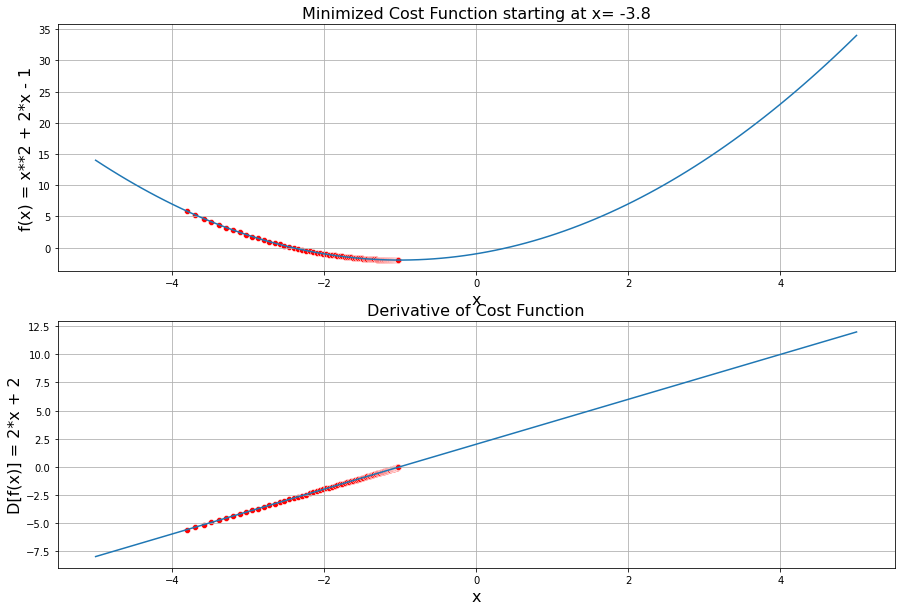

In [4]:
def f(x):
    return x**2+2*x-1


x_orig = -3.8
x,x_list,slope_list,step_size = gradient_descent(f,
                                                 x_orig,
                                                 display_output=True,
                                                 linspace_range=[-5,5,100])




### Multiple Minima

Results :

Total allowed iterations :  50000
Last iteration :  25

Starting x :  0.3
Starting cost function :  1.6481

Local minimum x :  1.4124686625557128
Minimized Cost Function :  -1.9999756726406548
Step size :  0.0008178531409557266 



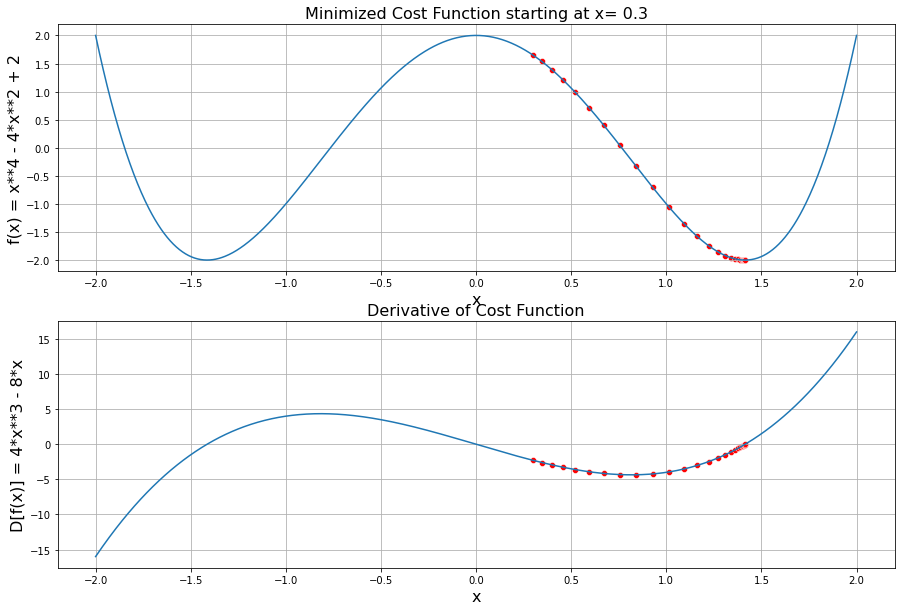

In [5]:
def f(x):
    return x**4-4*(x**2)+2


x_orig = 0.3
x,x_list,slope_list,step_size = gradient_descent(f,
                                                 x_orig,
                                                 display_output=True,
                                                 linspace_range=[-2,2,1000])




Results :

Total allowed iterations :  50000
Last iteration :  21

Starting x :  -0.52
Starting cost function :  0.99151616

Local minimum x :  -1.4124498836625325
Minimized Cost Function :  -1.9999751465232607
Step size :  0.0008266194835861995 



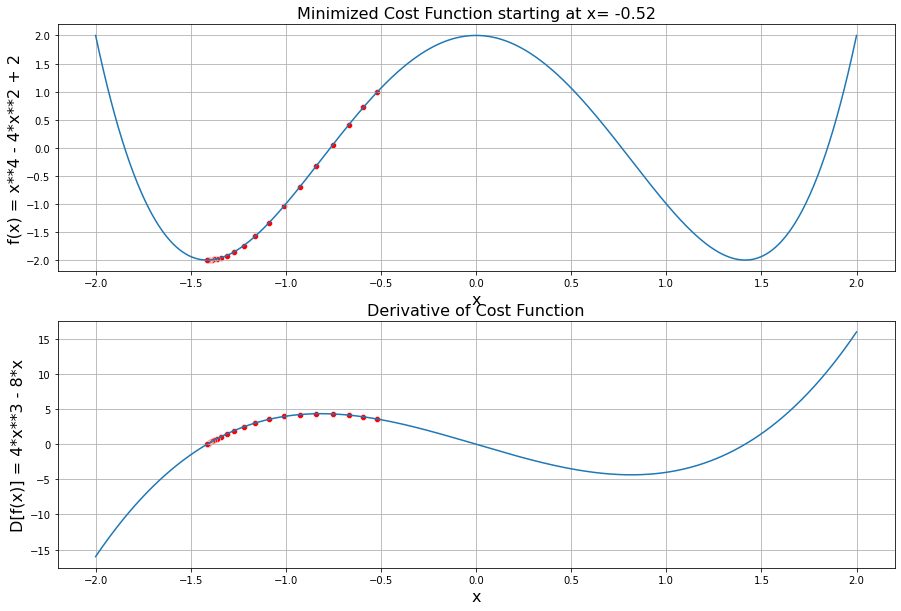

In [6]:
x_orig = -0.52
x,x_list,slope_list,step_size = gradient_descent(f,
                                                 x_orig,
                                                 display_output=True,
                                                 linspace_range=[-2,2,1000])

Results :

Total allowed iterations :  50000
Last iteration :  0

Starting x :  0
Starting cost function :  2

Local minimum x :  0.0
Minimized Cost Function :  2.0
Step size :  0.0 



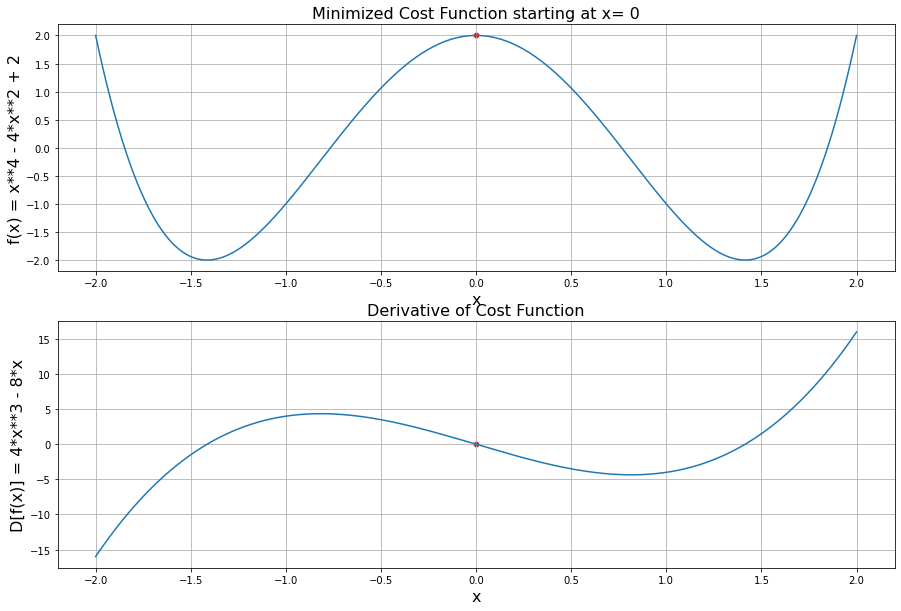

In [7]:
x_orig = 0
x,x_list,slope_list,step_size = gradient_descent(f,
                                                 x_orig,
                                                 display_output=True,
                                                 linspace_range=[-2,2,1000])

In [8]:
import sys

In [11]:
sys.float_info.max

1.7976931348623157e+308